# Assignment 2 - Data Visualisation

#### Student: Darragh Sherwin - s00211714

### Question 1

Q1. Create an animated time series plot from the given dataset, time_series_19-covidConfirmed_archived_0325.csv, to show the evolution of confirmed COVID cases for India
from Jan 2020 until March 2020. (Marks: 50)
Requirements:
1. Import the required libraries in Python.
2. Select the Confirmed Cases of Country = “India”/row = 15 from the given columns (from column 5 onwards).
3. Write a function in Python to get the required data and parameters for plotting.
4. Convert the date column to day/month format.
5. Plot the confirmed cases on Y-axis with the dates on X-axis.
6. Create a Writer object with the required ‘frames per second’ setting and bitrate.
7. Define the animate function.
8. Call animate via the appropriate function from the matplotlib animation library
9. Display the animated video.
10. All the above should be done in Jupyter Notebook and the notebook file should be shared/uploaded via Github link in Moodle.


#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.dates import DateFormatter
from matplotlib.animation import FuncAnimation
from IPython.display import Video



%matplotlib inline
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey','figure.edgecolor':'black','axes.grid':True})

In [2]:
covid_df = pd.read_csv("time_series_19-covid-Confirmed_archived_0325.csv")

In [3]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


#### Select the Confirmed Cases of Country = “India”/row = 15 from the given columns (from column 5 onwards).

In [4]:
def getdata(country):
    country_cases = covid_df.loc[covid_df['Country/Region'] == country]
    country_cases = country_cases[country_cases.columns[4:]]
    #country_cases.columns = pd.to_datetime(country_cases.columns).strftime('%d %b')
    country_cases = country_cases.transpose()
    country_cases = country_cases.rename(columns={15:'Cases'})
    country_cases.Cases = country_cases.Cases.astype(int)
    country_cases['Date'] = country_cases.index
    country_cases['Date'] = pd.to_datetime(country_cases['Date'])#.strftime('%d %b')

    country_cases = country_cases.set_index('Date')
    return country_cases

In [5]:
country_cases = getdata('India')

In [6]:
%matplotlib notebook
title = 'Cases'

In [7]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

In [8]:
country_cases.index[0]

Timestamp('2020-01-22 00:00:00')

<IPython.core.display.Javascript object>


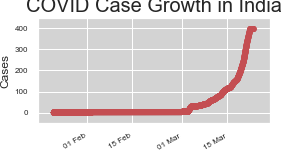

Text(0.5, 1.0, 'COVID Case Growth in India')

In [9]:
fig, ax = plt.subplots()
#fig = plt.figure(figsize=(15,10))

fig.set_figheight(10)
fig.set_figwidth(15)

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

plt.xlim(country_cases.index[0]-pd.DateOffset(days=5), country_cases.index[:][-1]+pd.DateOffset(days=5))
plt.ylim(np.min(country_cases.Cases)-50, np.max(country_cases.Cases)+50)
plt.xlabel('Date')
plt.ylabel(title)
fig.autofmt_xdate()
plt.title('COVID Case Growth in India',fontsize=20)

In [10]:
def animate(i):
    data = country_cases.iloc[:int(i+1)] 
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=8)
    plt.setp(p.lines,linewidth=6)

In [11]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=65, repeat=True)

In [12]:
ani.save('CasesInIndia.mp4', writer=writer)

In [13]:
Video("CasesInIndia.mp4", embed=True, html_attributes="loop controls muted autoplay")

### Question 2

Q2. Apply Principal Component Analysis (PCA) to the input parameters of Droplet Data.csv
provided in Moodle under Week 8. This data has five input parameters, which include
area, count, maximum Feret diameter, minimum Feret diameter and perimeter. It also
includes the class/category column, which is the response.
Apply K-Means clustering to the most significant PCs (cumulatively explaining over 95% of
variance) and plot the most significant PCs for the predicted response as well as the
original response. Compare and present your inference. 

In [14]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [15]:
droplet_df = pd.read_csv("DropletData.csv")

In [16]:
droplet_df = droplet_df.drop('Unnamed: 0', axis = 1)
droplet_df

,Area,Count,maxFeret,minFeret,Perimeter,class
0,34.597073,1394,7.178624,4.846646,24.155433,U
1,37.834522,1294,7.534622,5.069885,25.006611,U
2,37.423876,1338,7.354161,4.994525,24.084755,U
3,36.133785,1374,7.267336,4.817726,23.775612,U
4,31.652493,1566,6.917425,4.656928,22.818458,U
...,...,...,...,...,...,...
145,6.671160,6390,3.893488,2.540674,11.382212,T
146,6.713676,6657,3.898151,2.553997,11.299202,T
147,6.990750,6207,3.953353,2.585886,11.682566,T
148,7.250347,6097,4.026888,2.622310,11.988663,T


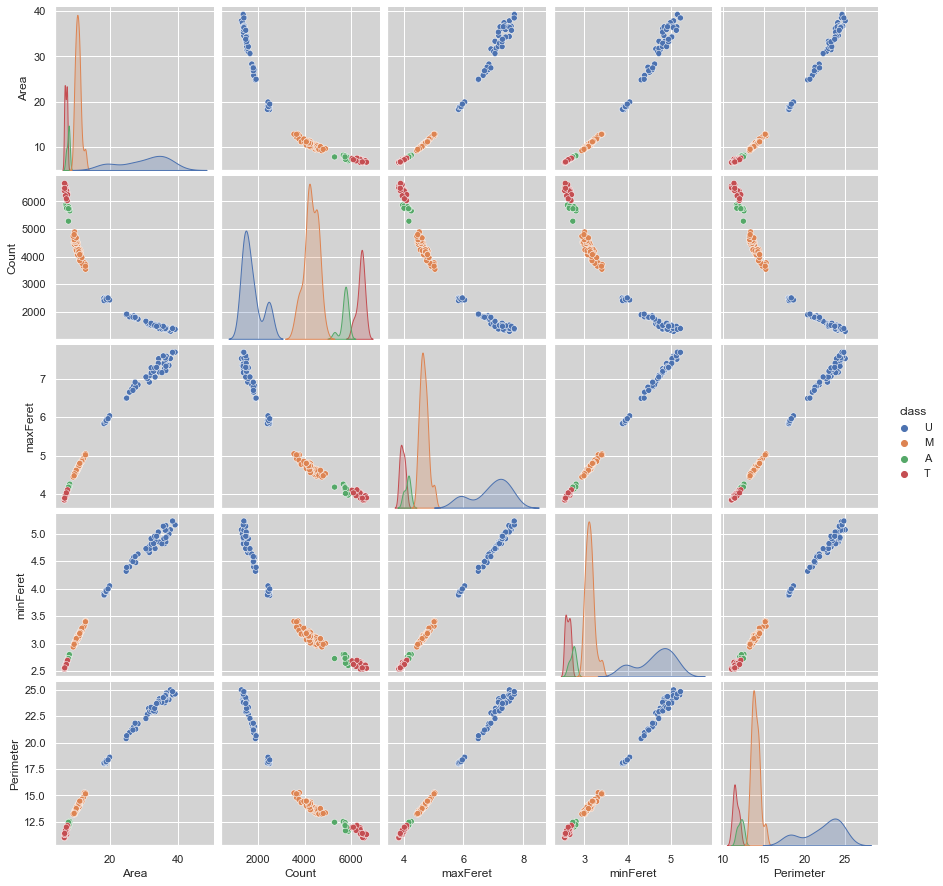

In [17]:
sns.pairplot(data=droplet_df, hue='class')

<AxesSubplot:>

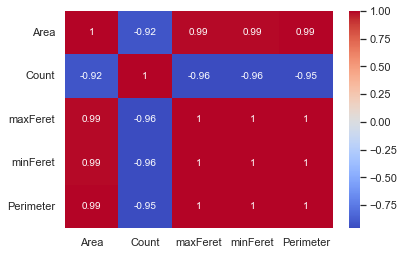

In [18]:
sns.heatmap(droplet_df.corr(), annot=True, cmap="coolwarm") 

Features are highly correlated 

In [19]:
features = ['Area', 'Count', 'maxFeret', 'minFeret', 'Perimeter']
x = droplet_df.loc[:, features].values
y = droplet_df.loc[:,['class']].values
print(x, y)

[[3.45970732e+01 1.39400000e+03 7.17862410e+00 4.84664562e+00
  2.41554333e+01]
 [3.78345224e+01 1.29400000e+03 7.53462210e+00 5.06988485e+00
  2.50066113e+01]
 [3.74238759e+01 1.33800000e+03 7.35416069e+00 4.99452466e+00
  2.40847549e+01]
 [3.61337853e+01 1.37400000e+03 7.26733552e+00 4.81772635e+00
  2.37756121e+01]
 [3.16524930e+01 1.56600000e+03 6.91742529e+00 4.65692784e+00
  2.28184585e+01]
 [3.67687650e+01 1.40400000e+03 7.36201709e+00 4.93894231e+00
  2.42178825e+01]
 [3.65176131e+01 1.38800000e+03 7.22069524e+00 4.85047694e+00
  2.40002413e+01]
 [3.53461972e+01 1.37900000e+03 7.16657215e+00 4.81494851e+00
  2.38266875e+01]
 [3.59270670e+01 1.38700000e+03 7.40359697e+00 4.90613626e+00
  2.43376914e+01]
 [3.65293056e+01 1.36800000e+03 7.33229678e+00 4.92938450e+00
  2.43722807e+01]
 [3.14644542e+01 1.53000000e+03 7.07106536e+00 4.75777190e+00
  2.32567183e+01]
 [3.10658601e+01 1.58700000e+03 7.00827788e+00 4.70174039e+00
  2.26803567e+01]
 [3.17739929e+01 1.54700000e+03 7.090623

In [20]:
# Standardise the x features
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,Area,Count,maxFeret,minFeret,Perimeter
0,1.739649,-1.448516,1.532514,1.557877,1.760829
1,2.049832,-1.508493,1.821726,1.822674,1.950229
2,2.010488,-1.482103,1.675120,1.733285,1.745102
3,1.886883,-1.460511,1.604583,1.523574,1.676313
4,1.457526,-1.345356,1.320317,1.332841,1.463332


Run PCA on all 5 features and determine if we can reduce the number of features

In [21]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             )
principalDf.head(5)

,0,1,2,3,4
0,3.596671,0.177705,0.139577,-0.092419,-0.070925
1,4.096581,0.358027,0.097268,-0.036432,-0.025170
2,3.868550,0.307467,0.162864,0.085594,-0.017577
3,3.646536,0.230047,0.215934,0.004353,0.051197
4,3.094371,0.040972,0.122032,-0.047153,-0.038521


In [22]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 98.1,  99.9, 100. , 100. , 100. ])

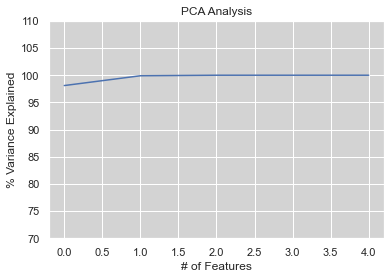

In [23]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(70,110)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

Based on the plot, only 1 feature is needed but we will use 2

In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,3.596671,0.177705
1,4.096581,0.358027
2,3.868550,0.307467
3,3.646536,0.230047
4,3.094371,0.040972


In [25]:
droplet_df[['class']].head()

,class
0,U
1,U
2,U
3,U
4,U


In [26]:
finalDf = pd.concat([principalDf, droplet_df[['class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,class
0,3.596671,0.177705,U
1,4.096581,0.358027,U
2,3.868550,0.307467,U
3,3.646536,0.230047,U
4,3.094371,0.040972,U


In [27]:
sorted( droplet_df['class'].unique() )

['A', 'M', 'T', 'U']

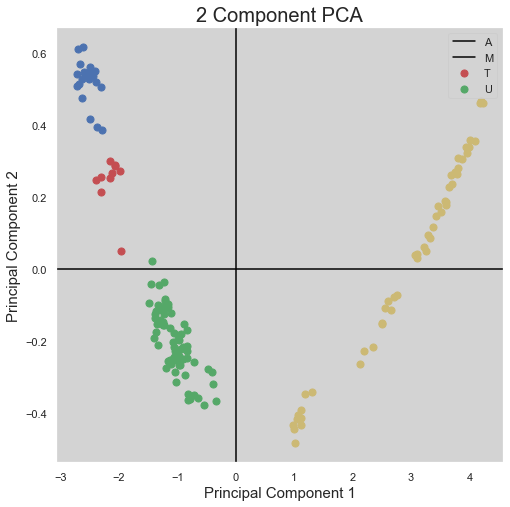

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = sorted( droplet_df['class'].unique())
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.legend(targets)
ax.grid()

Classes are well seperated


In [29]:
pca.explained_variance_

array([4.93635091, 0.09120222])

In [30]:
pca.explained_variance_ratio_

array([0.98068838, 0.01811884])

<AxesSubplot:xlabel='PC'>

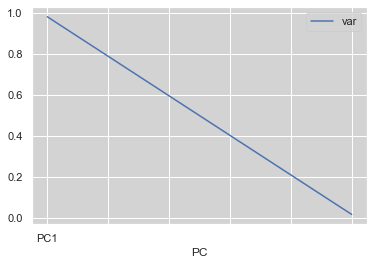

In [31]:
pcdf = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2']})
pcdf.plot(y = "var", x = "PC")

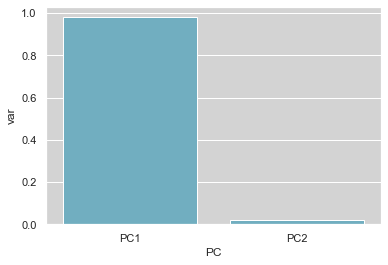

In [32]:
sns.barplot(x='PC',y="var", data=pcdf, color="c");

In [33]:
print(abs(pca.components_))

[[0.44618873 0.43656399 0.45116053 0.451084   0.45089345]
 [0.49058303 0.84763725 0.09180953 0.08422248 0.15911304]]


All features contribute to PC1

Count contributes significantly to PC2

Prinicpal Component 1 contributes 98% 

In [34]:
from sklearn.cluster import KMeans

nclusters = 4 # Using 4 for 4 classes
seed = 0 # seed is set to reproduce the prediction output/results

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
y_cluster_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [35]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,3.596671,0.177705
1,4.096581,0.358027
2,3.868550,0.307467
3,3.646536,0.230047
4,3.094371,0.040972


In [36]:
# first, convert species to an arbitrary number
droplet_df['target'] = droplet_df['class'].astype('category') 
y_array = droplet_df['target'].cat.codes

df_plot = principalDf.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['Class'] = y_array  # also add actual labels so we can use it in later plots
df_plot.head(10)

,principal component 1,principal component 2,ClusterKmeans,Class
0,3.596671,0.177705,2,3
1,4.096581,0.358027,2,3
2,3.868550,0.307467,2,3
3,3.646536,0.230047,2,3
4,3.094371,0.040972,2,3
5,3.809759,0.309975,2,3
6,3.682245,0.262952,2,3
7,3.578264,0.189585,2,3
8,3.787936,0.265836,2,3
9,3.808432,0.282713,2,3


In [37]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('seismic')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Droplet");

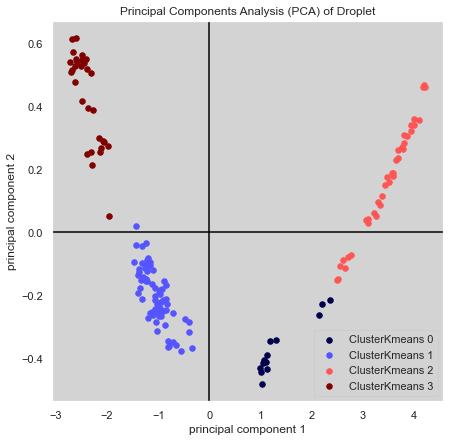

In [38]:
# plot the clusters each datapoint was assigned to
import matplotlib as mpl
plotData(df_plot, 'ClusterKmeans')

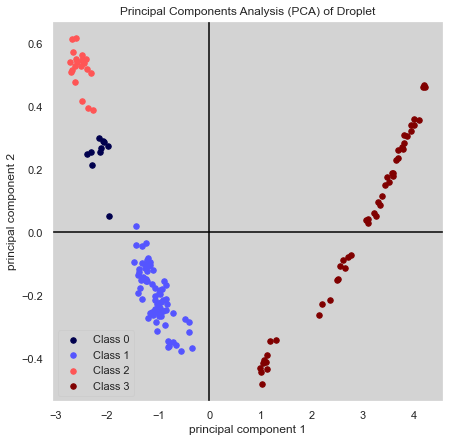

In [39]:
plotData(df_plot, 'Class')

### KMeans on the PCA

In [40]:
nclusters = 4 # Using 4 for the 4 classes
seed = 0 # seed is set to reproduce the prediction output/results

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(principalDf)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(principalDf)
y_cluster_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [41]:
pca_df_plot = principalDf.copy()
pca_df_plot['Class'] = y_array  # also add actual labels so we can use it in later plots
pca_df_plot.head(10)

,principal component 1,principal component 2,Class
0,3.596671,0.177705,3
1,4.096581,0.358027,3
2,3.868550,0.307467,3
3,3.646536,0.230047,3
4,3.094371,0.040972,3
5,3.809759,0.309975,3
6,3.682245,0.262952,3
7,3.578264,0.189585,3
8,3.787936,0.265836,3
9,3.808432,0.282713,3


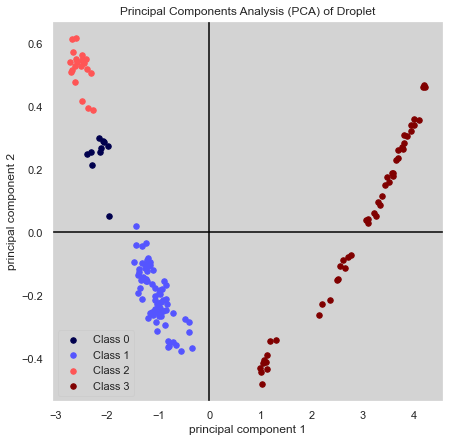

In [42]:
plotData(pca_df_plot, 'Class')

KMeans is providing no additional value, using PCA we can get seperation between the classes 